In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
import warnings

warnings.filterwarnings("ignore")
sys.path.append('..')

In [52]:
from scripts import vizualization as viz
from scripts import utils

In [2]:
df = pd.read_csv("../data/data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df.drop('Unnamed: 32', inplace=True, axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.shape

(569, 32)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

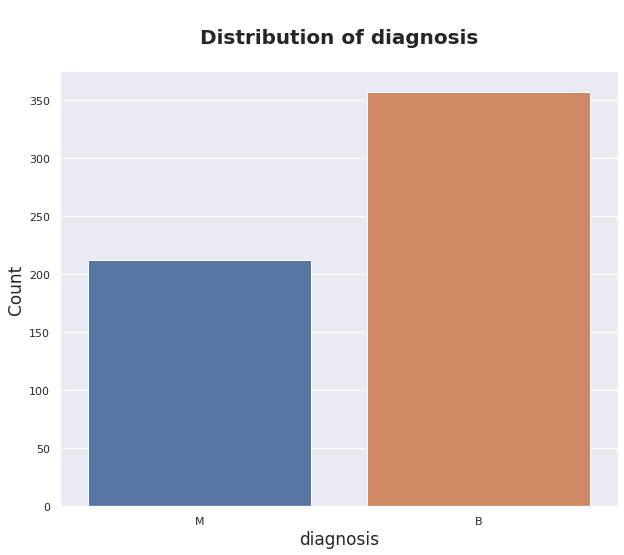

In [48]:
viz.count_plot(df,'diagnosis')

In [50]:
encoded_df = df.copy()
utils.encoding_data(encoded_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,...,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
1,842517,1,13.37,17.77,86.24,551.1,0.09587,0.07864,0.08690,0.07017,...,14.97,23.41,97.66,686.5,0.1238,0.1866,0.2416,0.09993,0.2750,0.08902
2,84300903,1,13.37,21.25,86.24,551.1,0.09587,0.09263,0.06154,0.03350,...,14.97,25.53,97.66,686.5,0.1444,0.2119,0.2267,0.09993,0.2822,0.08758
3,84348301,1,13.37,20.38,77.58,551.1,0.09587,0.09263,0.06154,0.03350,...,14.91,26.50,98.87,567.7,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
4,84358402,1,13.37,18.84,86.24,551.1,0.10030,0.09263,0.06154,0.03350,...,14.97,25.41,97.66,686.5,0.1374,0.2050,0.2267,0.09993,0.2822,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,13.37,18.84,86.24,551.1,0.09587,0.11590,0.06154,0.03350,...,14.97,26.40,97.66,686.5,0.1410,0.2113,0.2267,0.09993,0.2822,0.08004
565,926682,1,13.37,18.84,86.24,551.1,0.09780,0.10340,0.06154,0.03350,...,14.97,25.41,97.66,686.5,0.1166,0.1922,0.3215,0.09993,0.2572,0.08004
566,926954,1,13.37,18.84,86.24,551.1,0.09587,0.10230,0.09251,0.05302,...,14.97,25.41,97.66,686.5,0.1313,0.3094,0.3403,0.14180,0.2822,0.07820
567,927241,1,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,...,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004


In [13]:
# def corr_matrix(df,title:str,save_as):
#     plt.figure(figsize=(25, 20))
#     res=sns.heatmap(df.corr(), annot=True,fmt='.2f');
#     res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
#     res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
#     plt.title(title,size=18, fontweight='bold')
#     plt.savefig(f'../charts/{save_as}')
#     plt.show

In [53]:
utils.corr_matrix(encoded_df,'Correlation matrix of all the dataset','general_correlation.jpg')

AttributeError: module 'scripts.utils' has no attribute 'corr_matrix'

In [15]:
# def find_high_corr(df):
#     high_corr= df.corr()
#     high_corr_columns = high_corr.index[abs(high_corr['diagnosis'])>=0.5]
    
#     return high_corr_columns

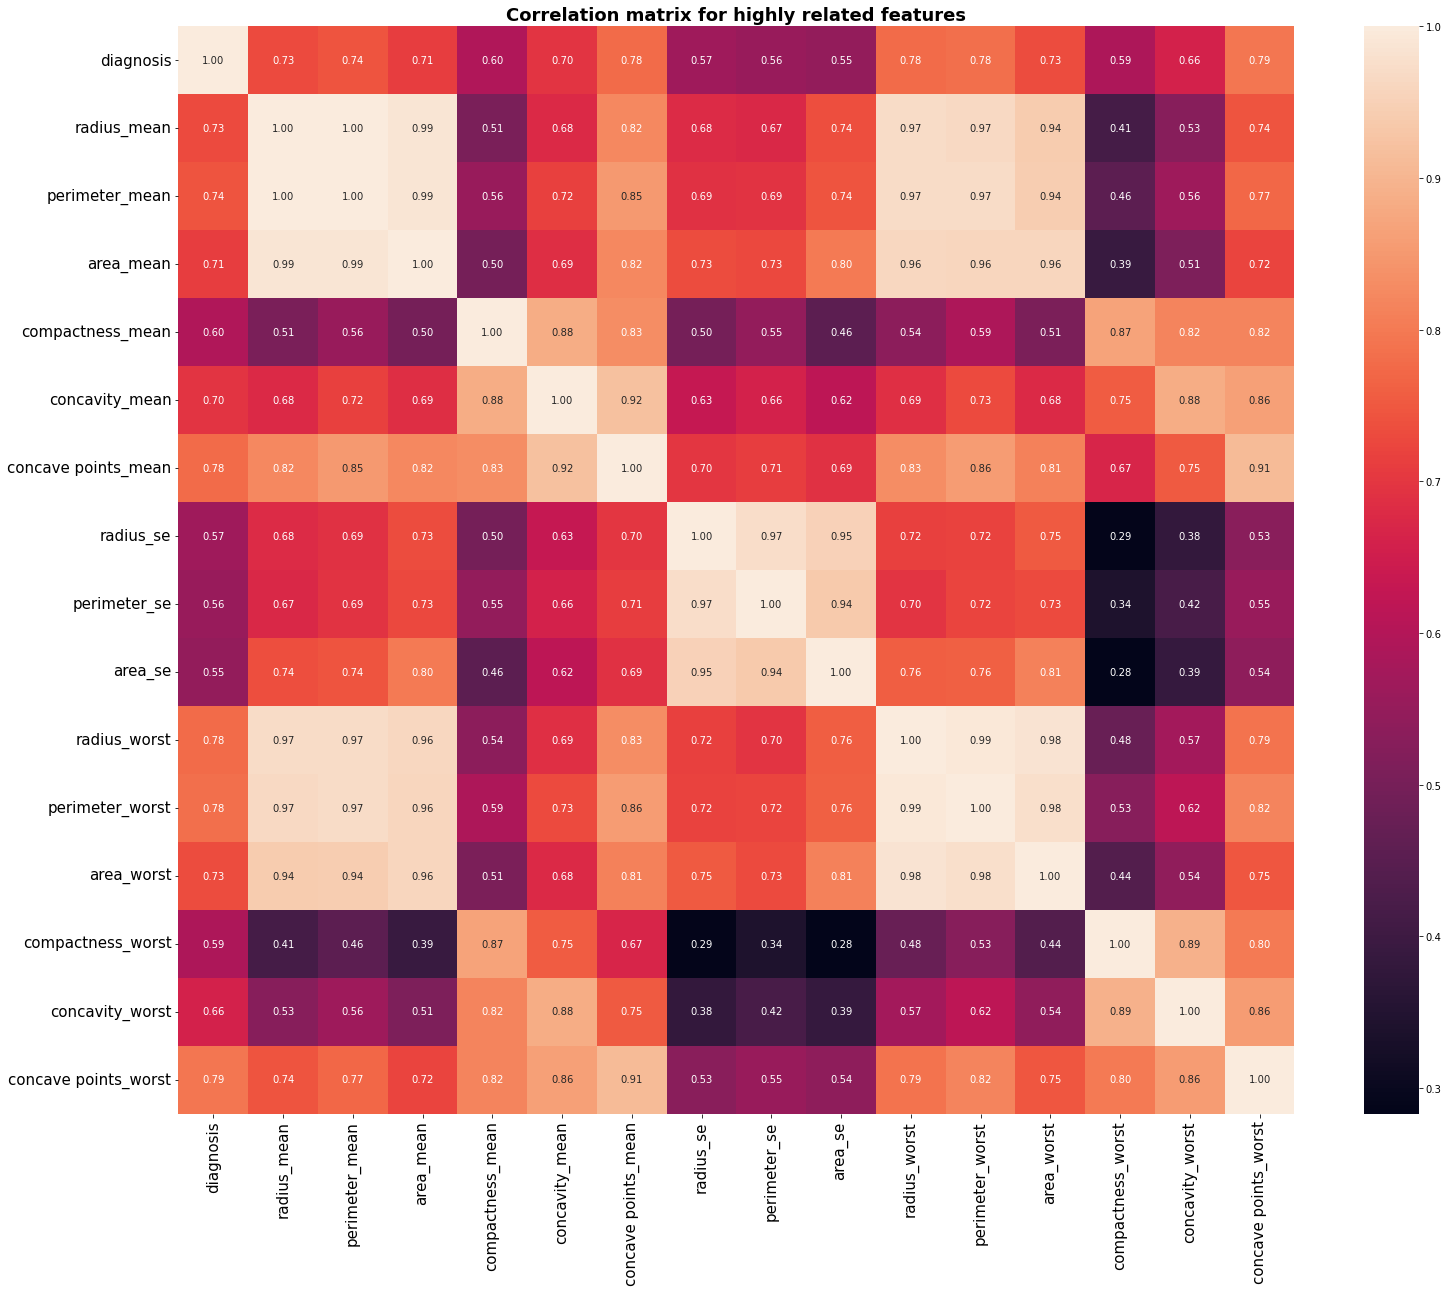

In [16]:
columns_for_analysis = utils.find_high_corr(encoded_df)
utils.corr_matrix(encoded_df[columns_for_analysis],'Correlation matrix for highly related features','higher_correlation.jpg')

In [17]:
def plot_ditribution(df,columns):
    for col in columns:
        sns.displot(df, x=col, hue="diagnosis",kind='kde',multiple='stack',palette=["red", "green"])
        plt.savefig('../charts/'+col+'_distribution.jpg')
        plt.show()

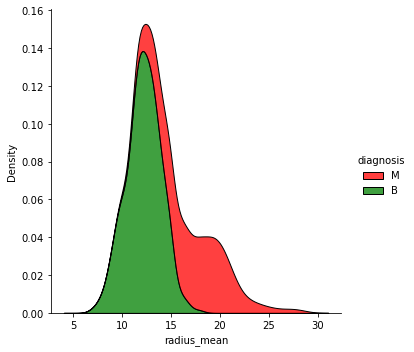

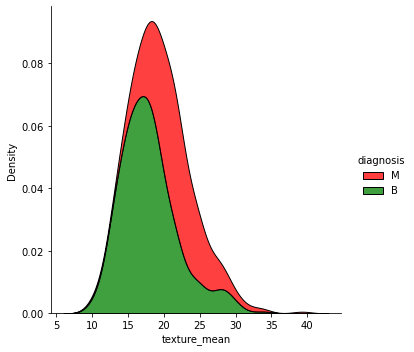

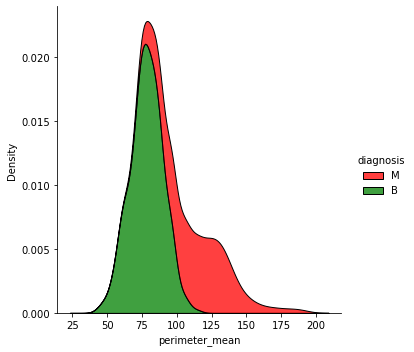

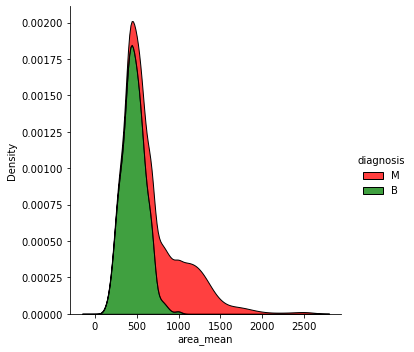

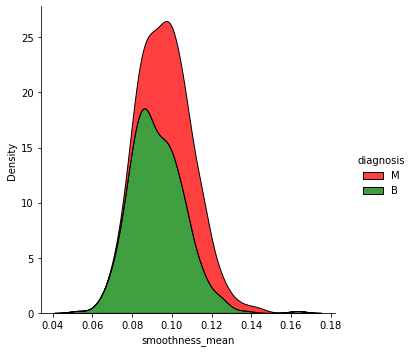

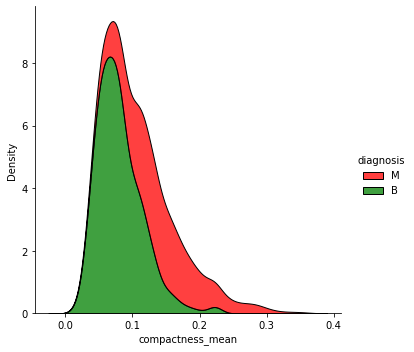

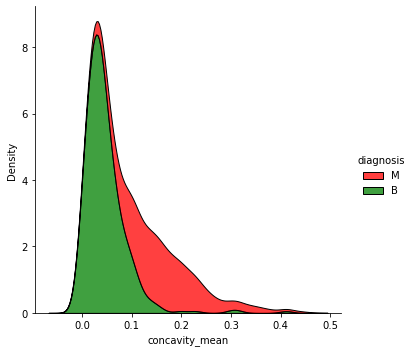

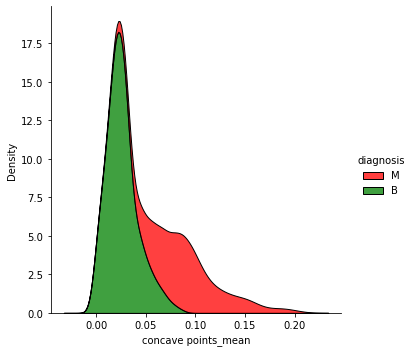

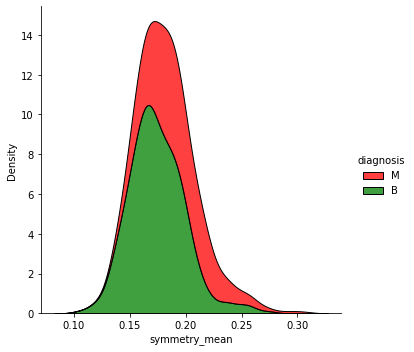

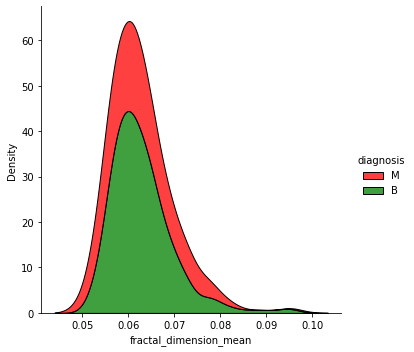

In [18]:
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

plot_ditribution(df,mean_col)

In [19]:
def feature_vs_target(df,features, fields):
    fig, axs = plt.subplots(10,3, figsize=(20,45))
    for col in range(len(features)):  
        for f in range(len(fields)):  
            sns.histplot(df, 
                        x=features[col]+"_"+fields[f], 
                        hue="diagnosis", element="poly", 
                        stat="count", 
                        palette=["red", "green"],
                        ax=axs[col][f])

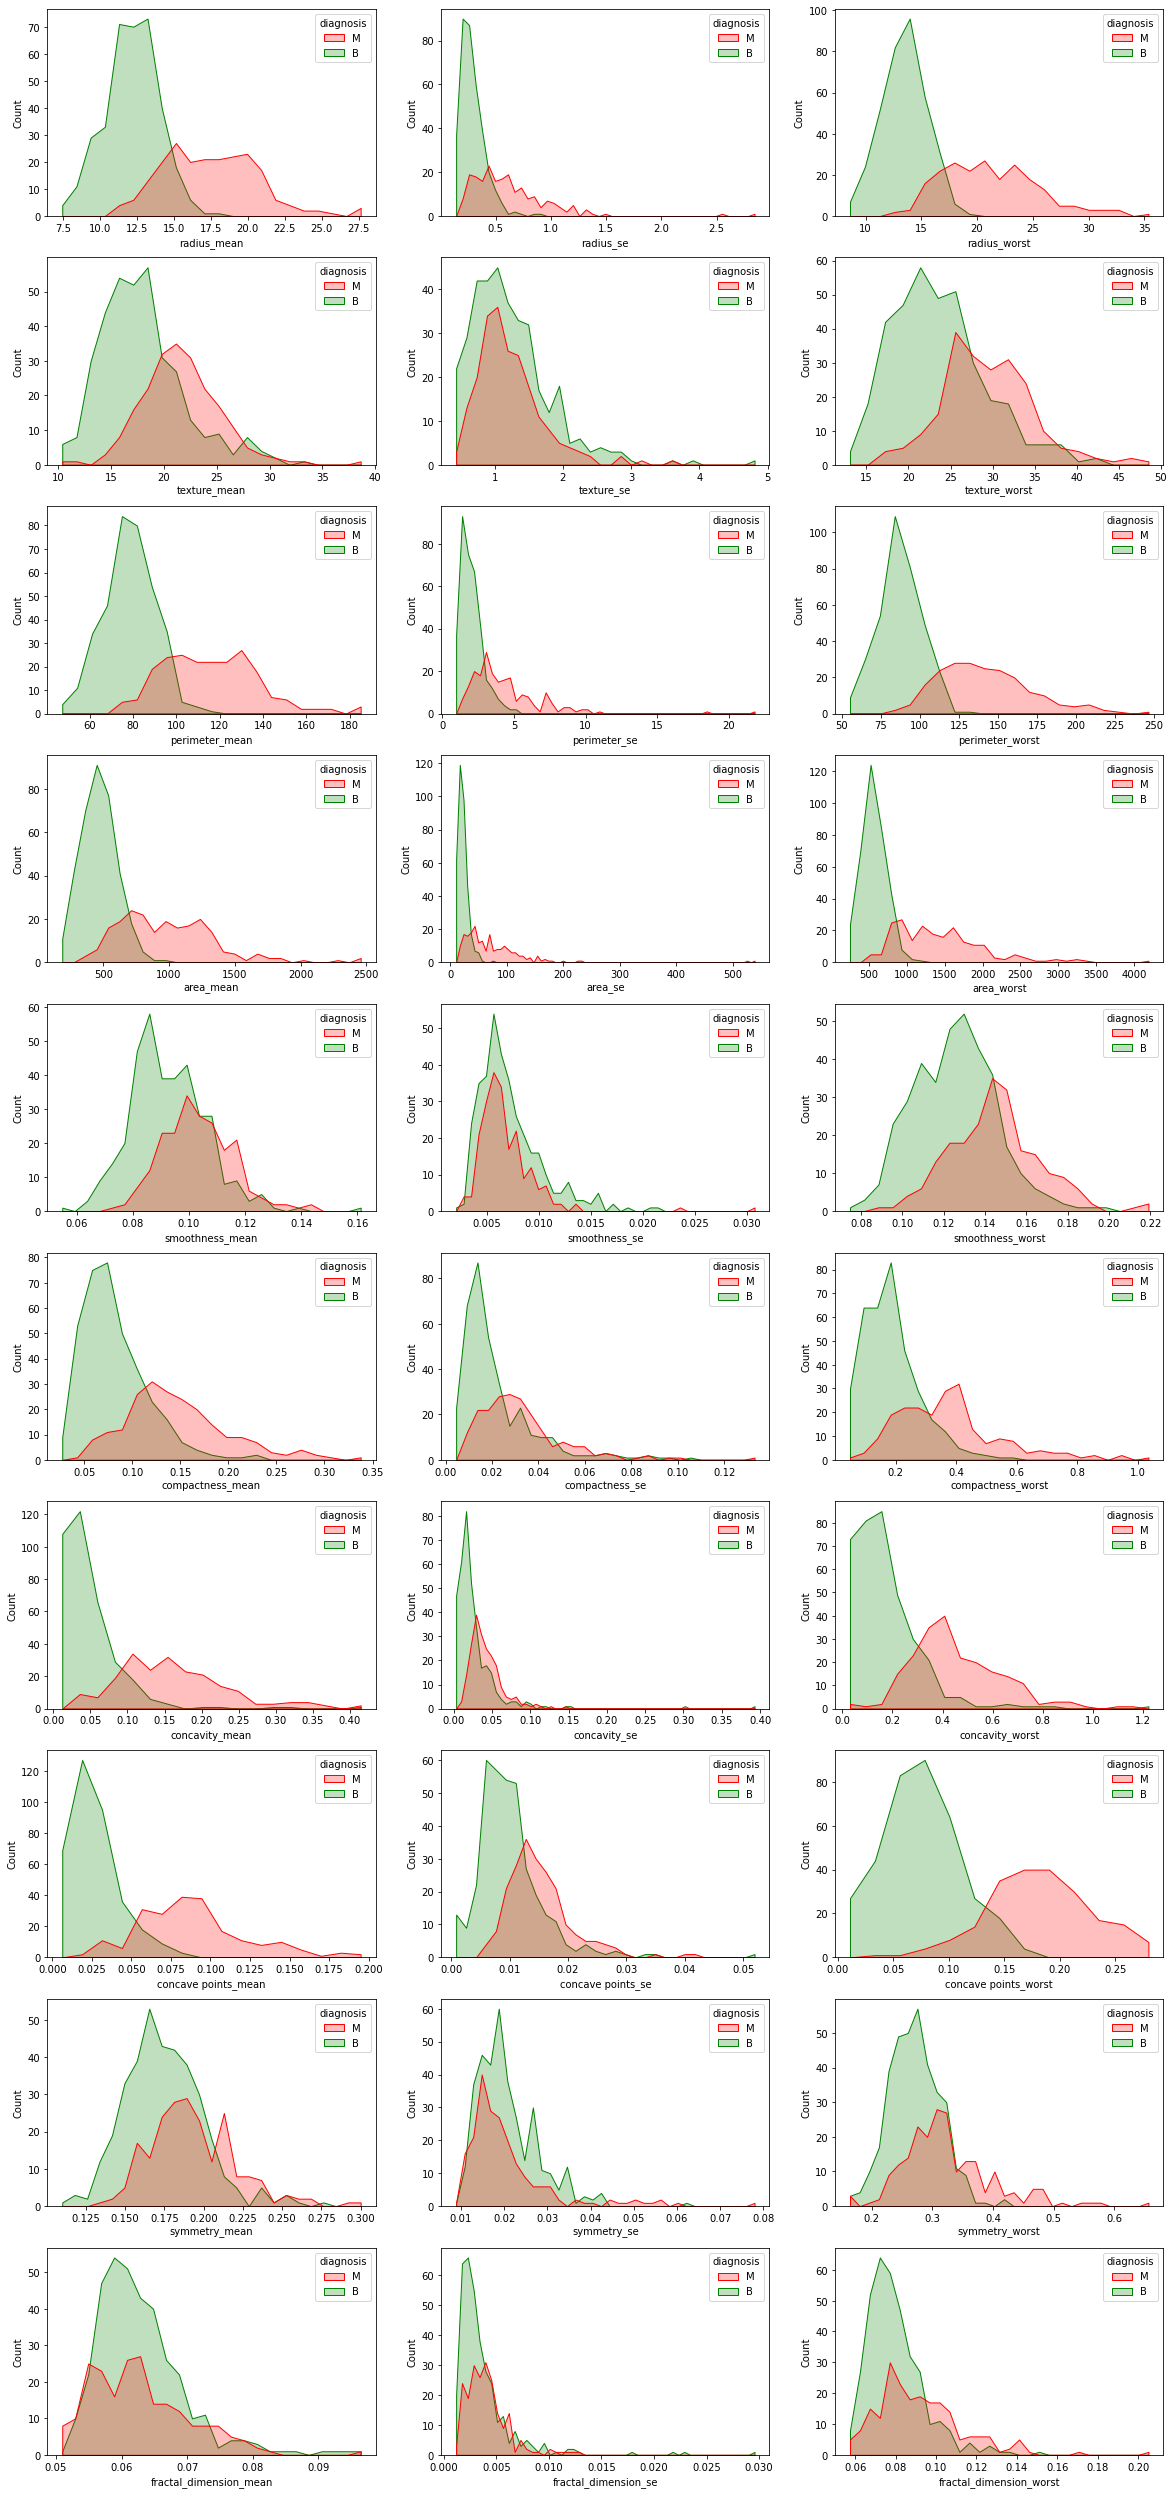

In [20]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
feature_vs_target(df,columns,fields)

In [21]:
def plot_outlier(df,columns,title):
    sns.set(style="darkgrid")
    data_frame = pd.melt(df, id_vars='diagnosis', value_vars=columns)
    plt.figure(figsize=(15, 8))
    res=sns.boxplot(x='variable', y='value',hue='diagnosis', data=data_frame,palette=["red", "green"])
    plt.title(title, size=18, fontweight='bold')
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
    plt.show()

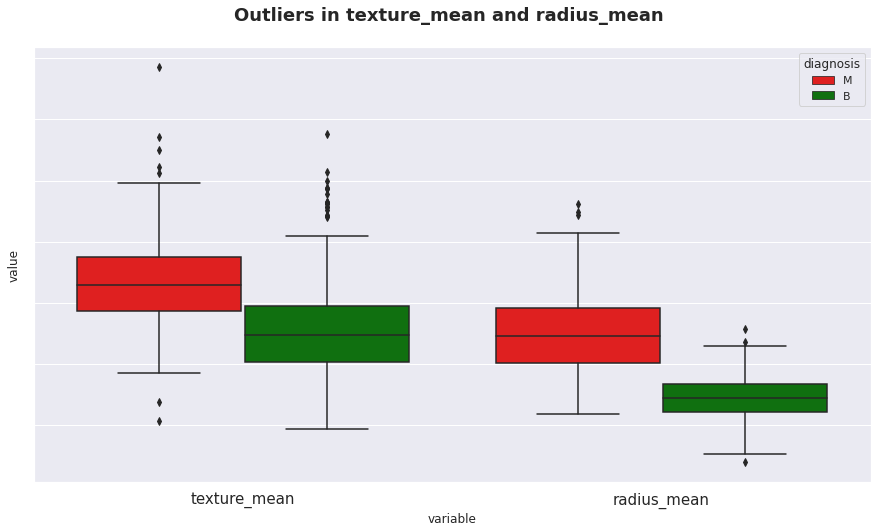

In [22]:
columns = ['texture_mean', 'radius_mean']
plot_outlier(df,columns,'Outliers in texture_mean and radius_mean \n')

In [23]:
def fix_outlier(df):
    column_name=list(df.columns[2:])
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].median(),np.where(df[i]<lower_quartile,df[i].median(),df[i]))
    return df

df_clean = fix_outlier(df)

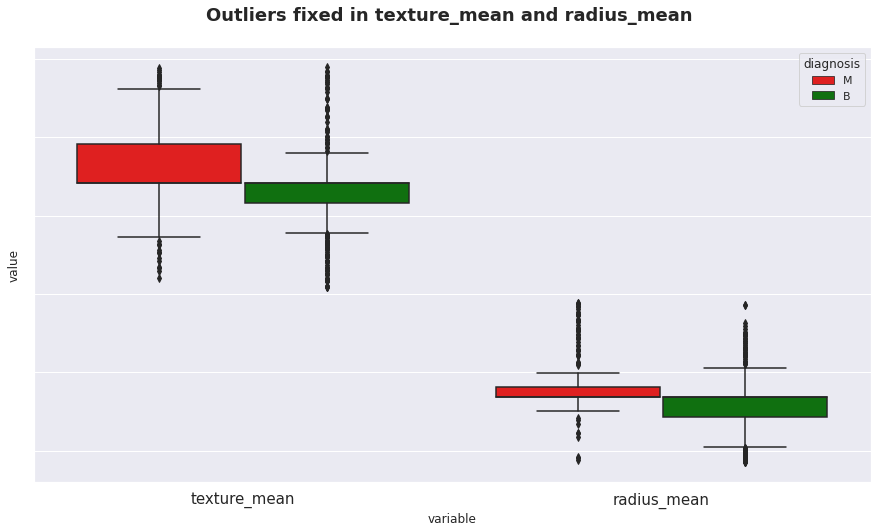

In [24]:
plot_outlier(df_clean,columns, 'Outliers fixed in texture_mean and radius_mean \n')

In [25]:
def scaler(df):
    df_new = (df-df.min())/(df.max()-df.min())
    return df_new

In [26]:
scaled_df = scaler(encoded_df)
scaled_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [27]:
new_df = scaled_df.drop(['id'],axis=1)
new_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [28]:
X = new_df.drop(["diagnosis"], axis=1)
y = new_df["diagnosis"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=10
)

In [30]:
classifier = RandomForestClassifier(n_estimators=100)

In [31]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print ('Accuracy Score of the random forest regressor is :',accuracy_score(y_test, y_pred))

Accuracy Score of the random forest regressor is : 0.9824561403508771


In [34]:
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
significant_features_df = feature_df.head(10)
significant_features_df.shape
significant_features_df.head()

,feature,importance
22,perimeter_worst,0.152062
27,concave points_worst,0.120345
20,radius_worst,0.117520
23,area_worst,0.101261
7,concave points_mean,0.094577


In [35]:
def plot_bar(df,title,save_as):
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x="importance", y="feature", data=df)
    ax.set_xlabel('Importance', fontsize=20)
    ax.set_ylabel('Feature', fontsize=20)
    ax.set_title(title, fontsize=30)
    plt.savefig('../charts/'+save_as)
    plt.show()

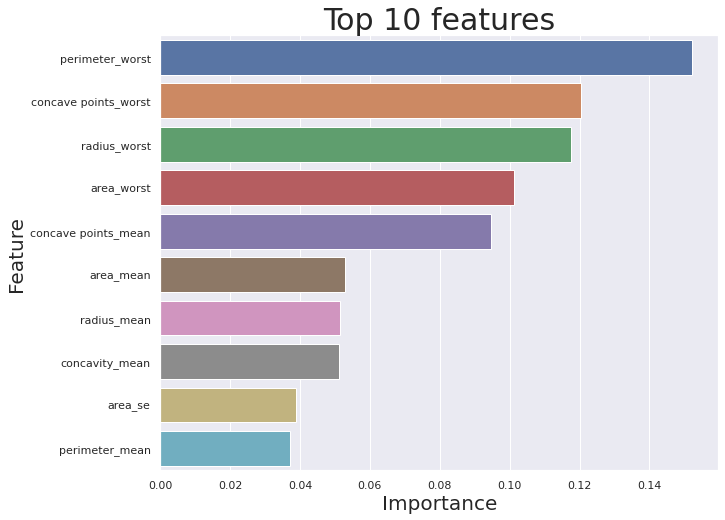

In [36]:
plot_bar(significant_features_df,'Top 10 features', 'top_10_features.jpg')

In [41]:
# After analysis and feature importance these features were considered as most important for the model

significant_feature_columns = ['concave points_mean','radius_worst','concave points_worst','perimeter_worst','area_mean','perimeter_mean','radius_mean']
final_df = new_df[significant_feature_columns]
final_df.head()

,concave points_mean,radius_worst,concave points_worst,perimeter_worst,area_mean,perimeter_mean,radius_mean
0,0.731113,0.620776,0.912027,0.668310,0.363733,0.545989,0.521037
1,0.348757,0.606901,0.639175,0.539818,0.501591,0.615783,0.643144
2,0.635686,0.556386,0.835052,0.508442,0.449417,0.595743,0.601496
3,0.522863,0.248310,0.884880,0.241347,0.102906,0.233501,0.210090
4,0.518390,0.519744,0.558419,0.506948,0.489290,0.630986,0.629893


In [42]:
norm = Normalizer()
clean_df = pd.DataFrame(norm.fit_transform(final_df), columns=significant_feature_columns)

In [43]:
clean_df['diagnosis'] = new_df['diagnosis']
clean_df.head()

,concave points_mean,radius_worst,concave points_worst,perimeter_worst,area_mean,perimeter_mean,radius_mean,diagnosis
0,0.429309,0.364519,0.535542,0.392431,0.213584,0.320604,0.305953,1.0
1,0.233319,0.406018,0.427609,0.361139,0.335565,0.411960,0.430264,1.0
2,0.395136,0.345844,0.519059,0.316042,0.279353,0.370308,0.373883,1.0
3,0.461150,0.219003,0.780439,0.212861,0.090760,0.205942,0.185294,1.0
4,0.354198,0.355124,0.381549,0.346380,0.334315,0.431132,0.430384,1.0


In [44]:
clean_df.to_csv('../data/cleaned_data.csv',index=False)